# Approach 2: Background estimation
For this approach, we consider a time series of motion (and lapse) images, i.e. all images in the serious are close together in time (here +- 10 min).

We extract the median image by taking the median of every pixel over all images in the series. Then, for every image the absolute difference to the median image is computed. As in the previous approach, we assume that anomalous images highly differ from the median image.

The median image is used as a (possibly more accurate) approximation of the background instead of the closest lapse image.

### Advantages compared to approach 1a
- more resistent to noise
- more resistent to small object movements
- only sensitive to camera movement within the time series

### Problems
- still no color information
- the lighting difference within the series are still a problem

In [1]:
%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

from py.Dataset import Dataset
from py.DatasetStatistics import DatasetStatistics
from py.Session import Session, MotionImage, LapseImage
from py.FileUtils import list_folders, list_jpegs_recursive
from py.ImageUtils import display_images

DIR = '/home/AMMOD_data/camera_traps/BayerWald/Vielkadaver-Projekt/' # dataset directory
SCALE = 0.2 # scaling factor for all images

ds = Dataset(DIR)
session = ds.create_session("beaver_01")

Found 32 sessions
Session 'Beaver_01' at folder: /home/AMMOD_data/camera_traps/BayerWald/Vielkadaver-Projekt/VIELAAS_Spring_Session01-VIELAAS_Beaver_01
Loaded scans.


In [2]:
img_set = session.get_random_motion_image_set(day_only=True)
before, after, rel = img_set[0].get_closest_lapse_images()
if rel < 0.15:
    img_set.append(before)
if rel > 0.85:
    img_set.append(after)
print(f"{len(img_set)} images in set")

Generating motion map...
10 images in set


In [3]:
# Read all images
imgs = []
for img in tqdm(img_set):
    arr = img.read(scale=SCALE, gray=True)
    # normalize
    # arr = (arr - np.mean(arr)) / np.std(arr)
    imgs.append(arr)
imgs = np.array(imgs)

  0%|          | 0/10 [00:00<?, ?it/s]

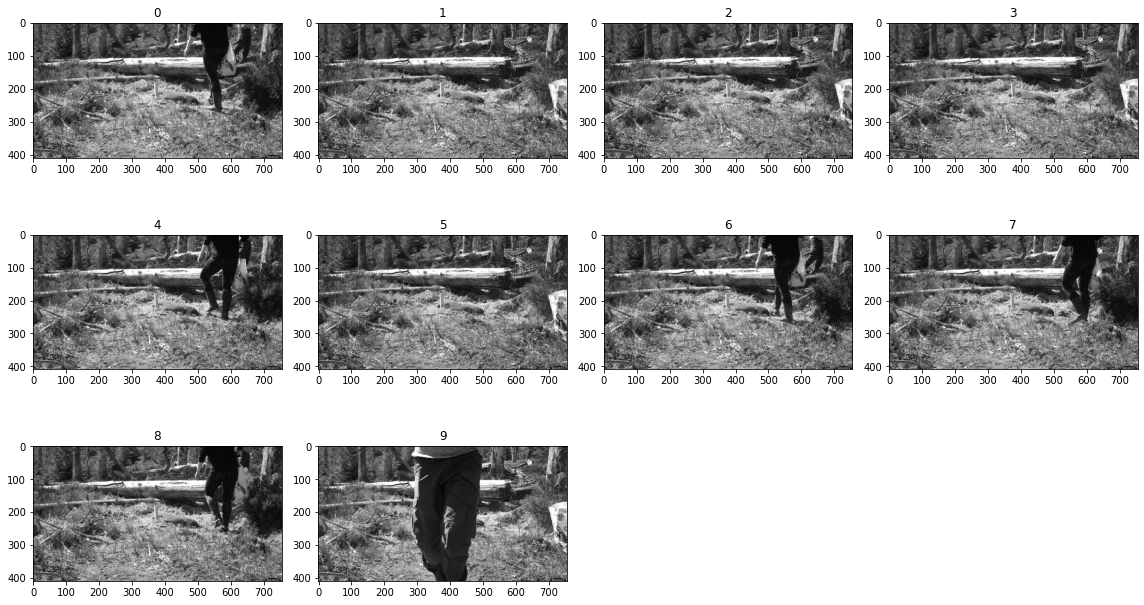

In [4]:
display_images(imgs, range(len(imgs)), row_size=4, size=(4, 3), cmap="gray", vmin=0, vmax=1)

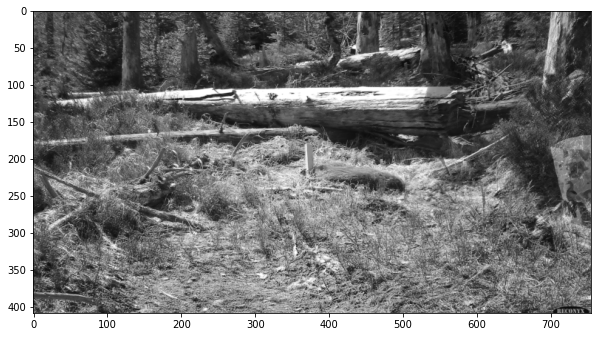

In [5]:
# Find median image
median = np.median(imgs, axis=0)
plt.figure(figsize=(10, 8))
plt.imshow(median, cmap="gray", vmin=0, vmax=1)

In [6]:
diffs = abs(imgs - median)

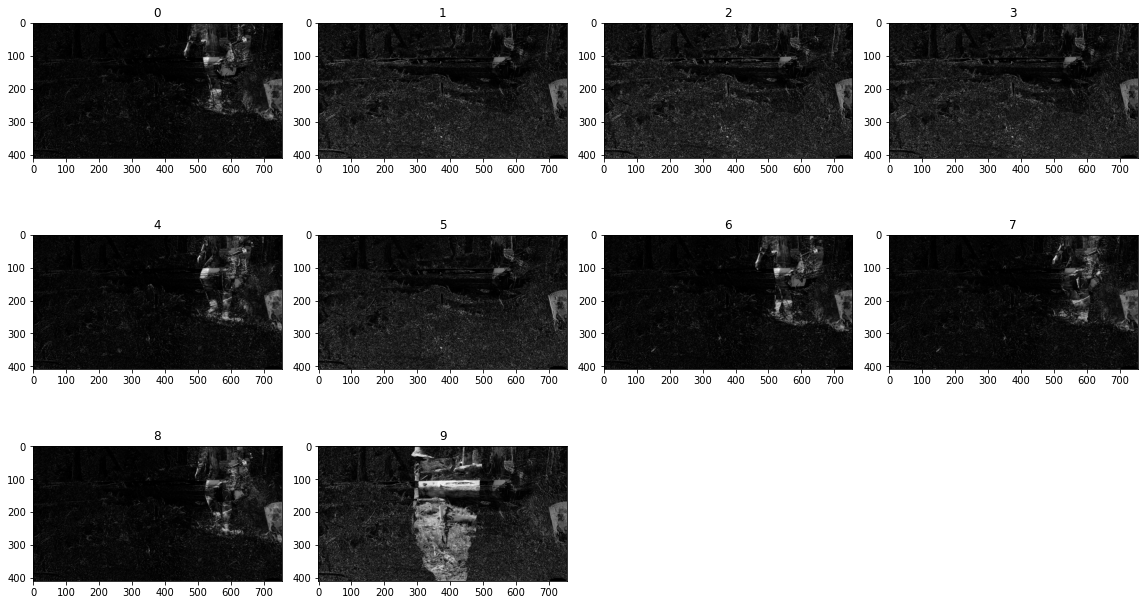

In [7]:
display_images(diffs, range(len(diffs)), row_size=4, size=(4, 3), cmap="gray", vmin=0, vmax=1)

## Complete test

In [10]:
results = []

for img_set in session.generate_motion_image_sets():
    before, after, rel = img_set[0].get_closest_lapse_images()
    if rel < 0.15:
        img_set.append(before)
    if rel > 0.85:
        img_set.append(after)
    print(f"{len(img_set)} images in set")
    
    # Read all images
    imgs = []
    for img in tqdm(img_set):
        arr = img.read(scale=SCALE, gray=True)
        # normalize
        # arr = (arr - np.mean(arr)) / np.std(arr)
        imgs.append(arr)
    imgs = np.array(imgs)

    # Find median image, calculate diffs
    median = np.median(imgs, axis=0)
    diffs = abs(imgs - median)
    absmeans = np.mean(diffs, axis=(1,2))
    absvars = np.var(diffs, axis=(1,2))
    for img, absmean, absvar in zip(img_set, absmeans, absvars):
        results.append([img.filename, absmean, absvar])

Generating motion map...
10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

31 images in set


  0%|          | 0/31 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

6 images in set


  0%|          | 0/6 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

26 images in set


  0%|          | 0/26 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

20 images in set


  0%|          | 0/20 [00:00<?, ?it/s]

11 images in set


  0%|          | 0/11 [00:00<?, ?it/s]

6 images in set


  0%|          | 0/6 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

6 images in set


  0%|          | 0/6 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

111 images in set


  0%|          | 0/111 [00:00<?, ?it/s]

35 images in set


  0%|          | 0/35 [00:00<?, ?it/s]

30 images in set


  0%|          | 0/30 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

36 images in set


  0%|          | 0/36 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

11 images in set


  0%|          | 0/11 [00:00<?, ?it/s]

11 images in set


  0%|          | 0/11 [00:00<?, ?it/s]

135 images in set


  0%|          | 0/135 [00:00<?, ?it/s]

5 images in set


  0%|          | 0/5 [00:00<?, ?it/s]

6 images in set


  0%|          | 0/6 [00:00<?, ?it/s]

30 images in set


  0%|          | 0/30 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

10 images in set


  0%|          | 0/10 [00:00<?, ?it/s]

11 images in set


  0%|          | 0/11 [00:00<?, ?it/s]

In [13]:
np.save("approach2_results.npy", results)

In [8]:
results = np.load("approach2_results.npy")
results

array([['Beaver_01_00001.jpg', '0.07339713371621975',
        '0.016482327844890864'],
       ['Beaver_01_00002.jpg', '0.043174318574336214',
        '0.008557891755676355'],
       ['Beaver_01_00003.jpg', '0.021930928804667908',
        '0.0016249670643696888'],
       ...,
       ['Beaver_01_00694.jpg', '0.1471134214473332',
        '0.02252222559624148'],
       ['Beaver_01_00695.jpg', '0.2253052059688789',
        '0.022776450121539317'],
       ['2021_07_03_18h_2445.jpg', '0.06071448579857448',
        '0.0036762659774526234']], dtype='<U23')

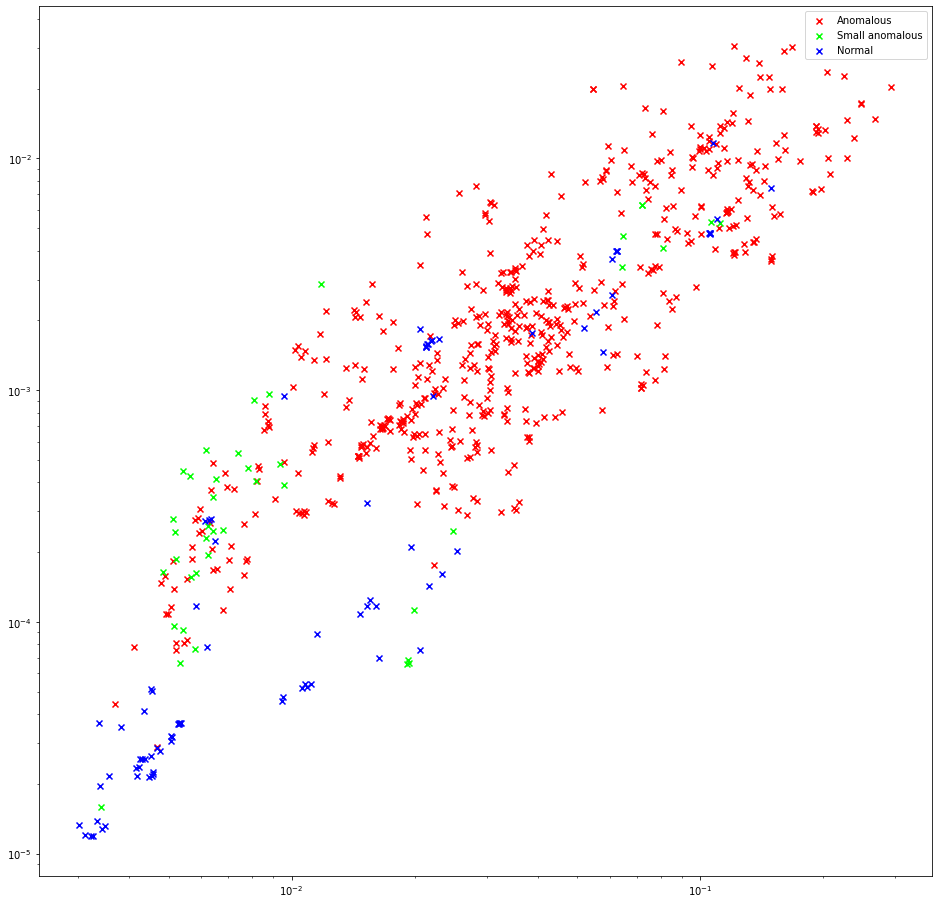

In [8]:
from py.Labels import LABELS


normal = []
anomalous = []
small_anomalous = []
for filename, absmean, absvar in results:
    vals = [float(absmean), float(absvar)]
    if filename.startswith("Beaver_01"):
        # motion img, check label
        if int(filename[10:-4]) in LABELS["Beaver_01"]["normal"]:
            normal.append(vals)
        elif int(filename[10:-4]) in LABELS["Beaver_01"]["small"]:
            small_anomalous.append(vals)
        else:
            anomalous.append(vals)
    else:
        # lapse image, always normal
        normal.append(vals)
normal = np.array(normal)
anomalous = np.array(anomalous)
small_anomalous = np.array(small_anomalous)

plt.figure(figsize=(16,16))
plt.scatter(anomalous[:,0], anomalous[:,1], label="Anomalous", color="red", marker="x")
plt.scatter(small_anomalous[:,0], small_anomalous[:,1], label="Small anomalous", color="lime", marker="x")
plt.scatter(normal[:,0], normal[:,1], label="Normal", color="blue", marker="x")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [6]:
float("0.45")

0.45